In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

matplotlib.rcParams['figure.fig-size'] = (12, 8)
# Read in the data
data_frame = pd.read_csv("movies.csv").dropna()

In [4]:
# Let's see if there is any missing data
for column in data_frame:
    percent_missing = np.mean(data_frame[column].isnull())
    print("{} - {}%".format(column, percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [5]:
# Data types for the columns in data_frame
data_frame.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
data_frame["budget"] = data_frame["budget"].astype("int64")

data_frame["gross"] = data_frame["gross"].astype("int64")

# Create correct year for movies
data_frame["year_corrected"] = data_frame["released"].astype(str).str[:4]

In [14]:
data_frame = data_frame.sort_values(by=["gross"], inplace=False, ascending=False)

In [8]:
pd.set_option("display.max_rows", None)

In [11]:
# Drop any duplicates
data_frame["company"] = data_frame["company"].drop_duplicates().sort_values(ascending=False)

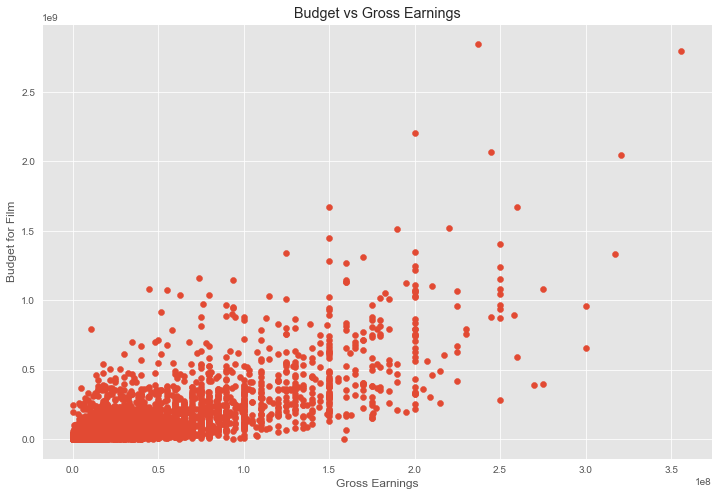

In [15]:
# Budget correlates with the gross
plt.scatter(x=data_frame["budget"], y=data_frame["gross"])

plt.title("Budget vs Gross Earnings")

plt.xlabel("Gross Earnings")

plt.ylabel("Budget for Film")

plt.show()

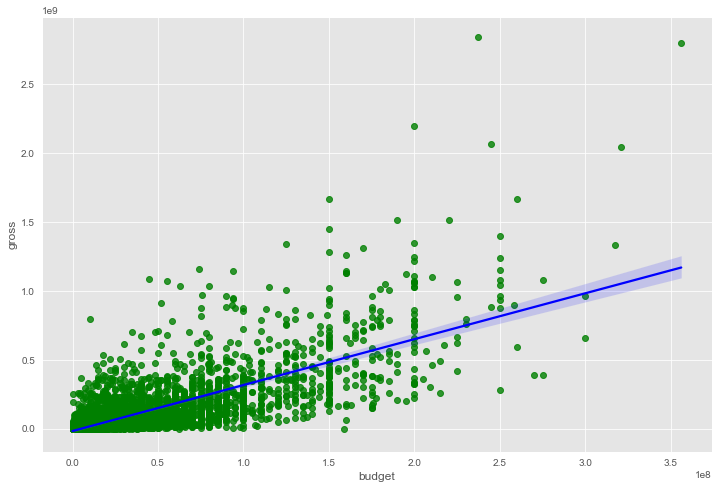

In [24]:
# Plot budget vs gross using seaborn

sns.regplot(x="budget",
            y="gross",
            data=data_frame,
            scatter_kws={"color": "green"},
            line_kws={"color": "blue"})

plt.show()

In [22]:
# Let's start looking at correlation
data_frame.corr(method="pearson") #Pearson(by default), kendall, spearman correlation...

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


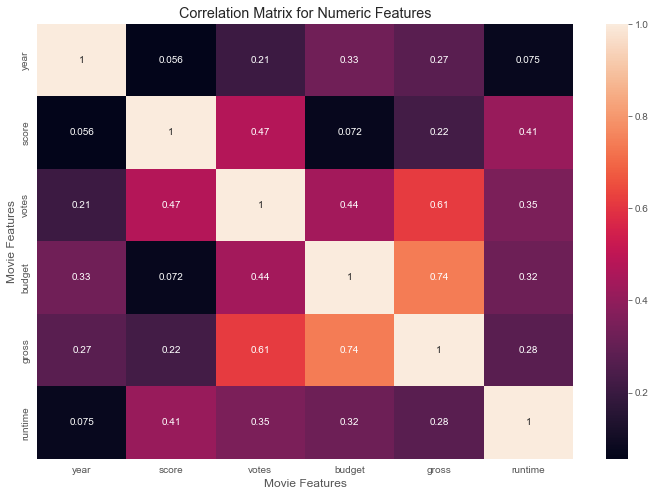

In [27]:
correlation_matrix = data_frame.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [28]:
# Looks at company
data_frame_numerized = data_frame

for column_name in data_frame_numerized:

    if data_frame_numerized[column_name].dtype == "object":

        data_frame_numerized[column_name] = data_frame_numerized[column_name].astype('category')
        data_frame_numerized[column_name] = data_frame_numerized[column_name].cat.codes

data_frame_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,-1,162.0,7
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,-1,181.0,5
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,-1,194.0,7
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,-1,138.0,7
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,-1,149.0,5
7480,4388,4,2,2019,1126,6.9,222000.0,1012,1361,457,47,260000000,1670727580,-1,118.0,10
6653,2117,5,0,2015,1303,7.0,593000.0,335,2523,293,47,150000000,1670516444,-1,124.0,11
6043,3878,5,0,2012,1899,8.0,1300000.0,1060,1646,1470,47,220000000,1518815515,983,143.0,13
6646,1541,5,0,2015,165,7.1,370000.0,809,481,1785,47,190000000,1515341399,-1,137.0,5
7494,1530,4,2,2019,2053,6.8,148000.0,277,1383,1036,47,150000000,1450026933,-1,103.0,14


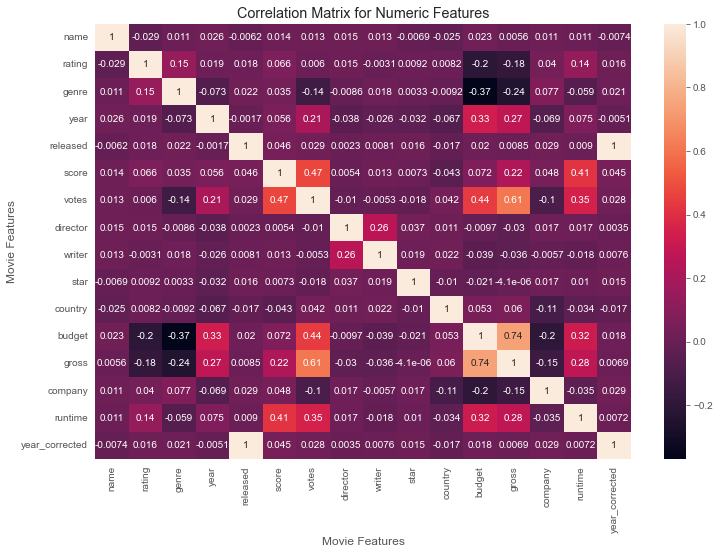

In [29]:
correlation_matrix = data_frame_numerized.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [31]:
correlation_matrix_detail = data_frame_numerized.corr()

corr_pairs = correlation_matrix_detail.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

gross           votes             0.614751
votes           gross             0.614751
budget          gross             0.740247
gross           budget            0.740247
released        year_corrected    0.996181
year_corrected  released          0.996181
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation